<a href="https://colab.research.google.com/github/DhanyashreeVK/Online_Transaction_Fraud_Detection/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fraud counts:
Fraud
0    797404
1     16254
Name: count, dtype: int64


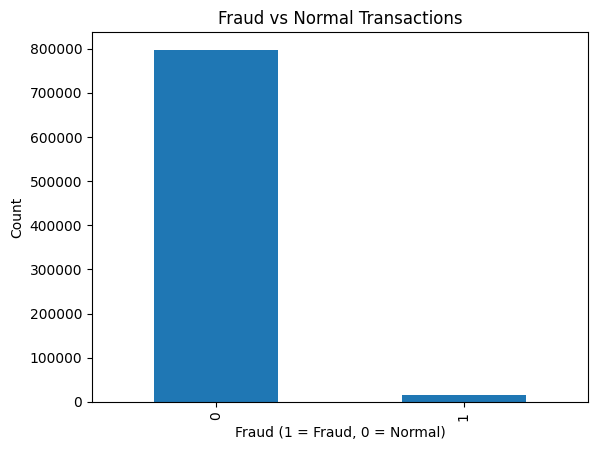

In [3]:
#-----------------------------------
# Online transaction fraud detection
#-----------------------------------

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# 1. Load data
df = pd.read_csv("/content/sample_data/transaction_data.csv.zip")

# 2. Clean time column
df["TransactionTime"] = (
    df["TransactionTime"]
    .str.replace(" IST", "", regex=False)
)
df["TransactionTime"] = pd.to_datetime(df["TransactionTime"], errors="coerce")

df = df.dropna(subset=["TransactionTime"])
df = df[df["UserId"] != -1]

# 3. Simple features
df["Amount"] = df["NumberOfItemsPurchased"] * df["CostPerItem"]
df["Is_International"] = (df["Country"] != "United Kingdom").astype(int)

# 4. Select model features
X = df[[
    "Amount",
    "NumberOfItemsPurchased",
    "Is_International"
]]

# 5. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Train Isolation Forest
model = IsolationForest(
    n_estimators=100,
    contamination=0.02,
    random_state=42
)

df["Fraud"] = model.fit_predict(X_scaled)
df["Fraud"] = df["Fraud"].map({-1: 1, 1: 0})

# 7. Results
print("Fraud counts:")
print(df["Fraud"].value_counts())

# 8. Simple visualization
plt.figure()
df["Fraud"].value_counts().plot(kind="bar")
plt.title("Fraud vs Normal Transactions")
plt.xlabel("Fraud (1 = Fraud, 0 = Normal)")
plt.ylabel("Count")
plt.show()